In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#getting the data 
Cancer = pd.read_csv('C:\\Kailash sukumaran\\learning\\haberman_cancer_dataset.csv' ,names=['Age','OperationYr','Nodes','Survival'])       
Cancer.head(12)

,Age,OperationYr,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [3]:
# Converting year format from 'YY'  to 'YYYY'
Cancer['OperationYr'] = Cancer['OperationYr'] + 1900 

In [4]:
# Getting Statistical description About the Data
print(' Dataset Shape: {} \n*********************** \nDataset Columns:\n{} \n********************** \nData Description:\n{} \n********************** \nDoes Data contains null values \n  {} '\
      .format(Cancer.shape, Cancer.columns, Cancer.describe(), Cancer.isnull().all()))

 Dataset Shape: (306, 4) 
*********************** 
Dataset Columns:
Index(['Age', 'OperationYr', 'Nodes', 'Survival'], dtype='object') 
********************** 
Data Description:
              Age  OperationYr       Nodes    Survival
count  306.000000   306.000000  306.000000  306.000000
mean    52.457516  1962.852941    4.026144    1.264706
std     10.803452     3.249405    7.189654    0.441899
min     30.000000  1958.000000    0.000000    1.000000
25%     44.000000  1960.000000    0.000000    1.000000
50%     52.000000  1963.000000    1.000000    1.000000
75%     60.750000  1965.750000    4.000000    2.000000
max     83.000000  1969.000000   52.000000    2.000000 
********************** 
Does Data contains null values 
  Age            False
OperationYr    False
Nodes          False
Survival       False
dtype: bool 


# Observation:
    we have 4 attributes with 306 observations.
    None of our columns contain Null values.
    Survey was done for the period 1958 to 1969.

In [5]:
# Splitting the data frame into Survived and Unsurvived
df_survived = Cancer[Cancer['Survival'] ==1 ]
df_unsurvived = Cancer[Cancer['Survival'] ==2 ]
print('-- Survived -- \n{} \n -- Unsurvived -- \n{}'.format(str(df_survived.shape[0]),str(df_unsurvived.shape[0])))

-- Survived -- 
225 
 -- Unsurvived -- 
81


# Observation:
    Survived: Count -- 225 probability  -- 0.74
    Unsurvived: Count -- 81 probability -- 0.26

In [6]:
#check Dataframe
df_survived.head(12)

,Age,OperationYr,Nodes,Survival
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1
5,33,1958,10,1
6,33,1960,0,1
9,34,1958,30,1
10,34,1960,1,1
11,34,1961,10,1


In [7]:
#check Dataframe
df_unsurvived.head(12)

,Age,OperationYr,Nodes,Survival
7,34,1959,0,2
8,34,1966,9,2
24,38,1969,21,2
34,39,1966,0,2
43,41,1960,23,2
44,41,1964,0,2
45,41,1967,0,2
53,42,1969,1,2
54,42,1959,0,2
62,43,1958,52,2


# Bivariate analysis

In [8]:
#Creating a Function for PDF analysis.
def CalPDFCDF(FeatureVariable, ClassVariable):
    sns.FacetGrid(data=Cancer, hue=ClassVariable, height=5) \
    .map(sns.distplot, FeatureVariable) \
    .add_legend()

C:\Users\sukumk1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


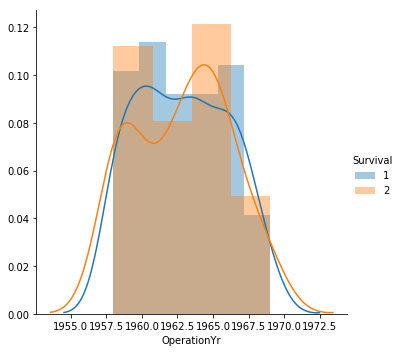

In [9]:
#PLOT 1.1
CalPDFCDF('OperationYr','Survival')

C:\Users\sukumk1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


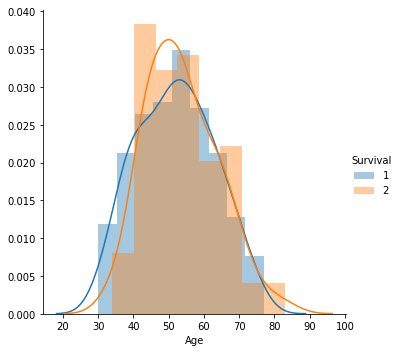

In [10]:
#PLOT 1.2
CalPDFCDF('Age','Survival')

C:\Users\sukumk1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


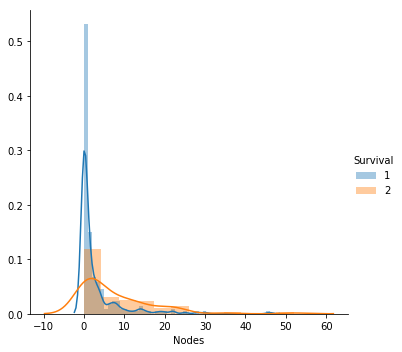

In [11]:
#PLOT 1.3
CalPDFCDF('Nodes','Survival')

# Observation: 
    Compare to 3 plots above. 
  
    Nodes Plot(1.3) showed difference in Survival and Unsurvived PDF.

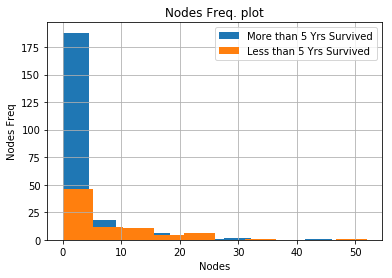

In [12]:
# NODES Histogram plot 
plt.title('Nodes Freq. plot')
plt.hist(df_survived.Nodes,label = 'More than 5 Yrs Survived')
plt.hist(df_unsurvived.Nodes,label = 'Less than 5 Yrs Survived')
plt.xlabel('Nodes')
plt.ylabel('Nodes Freq')
plt.legend()
plt.grid()

# Observation:
    Survived People have more nodes (on the whole) than unsurvived people.

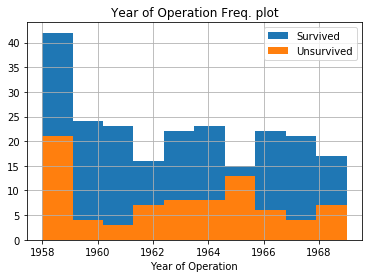

In [13]:
plt.title('Year of Operation Freq. plot')
plt.hist(df_survived.OperationYr,label = 'Survived')
plt.hist(df_unsurvived.OperationYr,label = 'Unsurvived')
plt.xlabel('Year of Operation')
plt.legend()
plt.grid()

# Observation:
    we could notice Survived people did more operation than Unsurvived, Almost Double the times done by unsurvived.

In [14]:
df_survived[df_survived['OperationYr'].between(1959,1964)].shape[0]


126

In [15]:
df_unsurvived[df_unsurvived['OperationYr'].between(1959,1964)].shape[0]

39

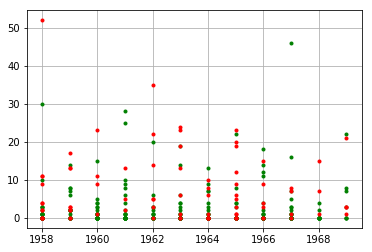

In [16]:
plt.plot(df_survived.OperationYr,df_survived.Nodes,'g.',label='Survived')
plt.plot(df_unsurvived.OperationYr,df_unsurvived.Nodes,'r.',label='unSurvived')
plt.grid()
plt.show()

In [17]:
df_survived.shape[0]

225

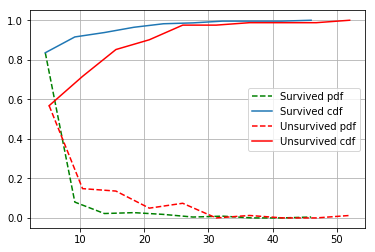

In [18]:
peak, interval_time = np.histogram(df_survived.Nodes,bins=10,density=True)
pdf = peak/sum(peak)
cdf = np.cumsum(pdf)
plt.plot(interval_time[1:],pdf,'g--',label='Survived pdf')
plt.plot(interval_time[1:],cdf,label='Survived cdf')
peak, interval_time = np.histogram(df_unsurvived.Nodes,bins=10,density=True)
pdf = peak/sum(peak)
cdf = np.cumsum(pdf)
plt.plot(interval_time[1:],pdf,'r--',label='Unsurvived pdf')
plt.plot(interval_time[1:],cdf,'r',label='Unsurvived cdf')
plt.legend()
plt.grid()
plt.show()


# Multivariate Analysis

C:\Users\sukumk1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sukumk1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sukumk1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\sukumk1\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encounte

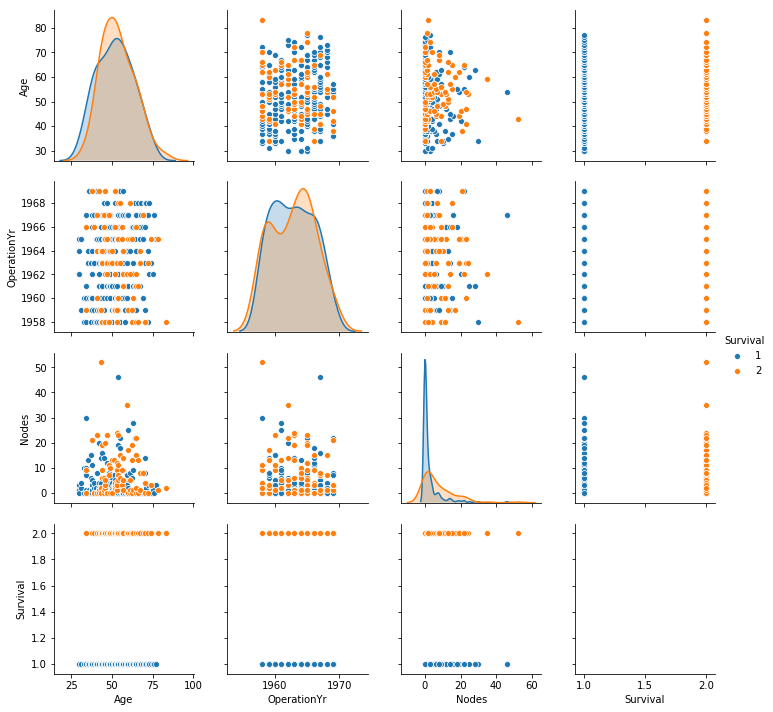

In [19]:
sns.pairplot(data=Cancer, hue='Survival')

# Bivariate Analysis

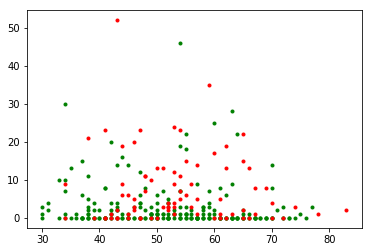

In [20]:
plt.plot(df_survived.Age,df_survived.Nodes,'g.')
plt.plot(df_unsurvived.Age,df_unsurvived.Nodes,'r.')

In [21]:
df_survived.Nodes.sum()/df_survived.Nodes.count()

2.7911111111111113

In [22]:
df_unsurvived.Nodes.sum()/df_unsurvived.Nodes.count()

7.45679012345679

# Observation:
    We could get a insight that on average unsurvived people have 2.5 times more nodes than survived.

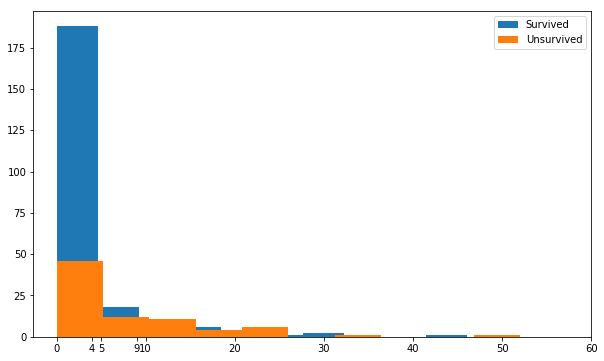

In [23]:
from  matplotlib.pyplot import figure
figure(figsize=(10,6))
plt.hist(df_survived.Nodes,label='Survived')
plt.hist(df_unsurvived.Nodes,label='Unsurvived')
plt.xticks([0,4,5,9,10,20,30,40,50,60])
plt.legend()

# Observation:
    We could see that major portion of the nodes for survival people is within 5 nodes. 
    More than 5 Nodes survival becomes tough

In [24]:
tempCancer = Cancer
tempCancer['Survived_Nodes'] = Cancer[Cancer['Survival']==1]['Nodes']
tempCancer['Unsurvived_Nodes'] = Cancer[Cancer['Survival']==2]['Nodes']
tempCancer['Survived_Count'] = Cancer[Cancer['Survival']==1]['Survival']
tempCancer['Unsurvived_Count'] = Cancer[Cancer['Survival']==2]['Survival']/2
tempCancer = tempCancer.replace(np.nan,0)
tempCancer['Agegrp'] =pd.cut(tempCancer.Age,[10,20,30,40,50,60,70,80,90])
tempCancer.head()

,Age,OperationYr,Nodes,Survival,Survived_Nodes,Unsurvived_Nodes,Survived_Count,Unsurvived_Count,Agegrp
0,30,1964,1,1,1.0,0.0,1.0,0.0,"(20, 30]"
1,30,1962,3,1,3.0,0.0,1.0,0.0,"(20, 30]"
2,30,1965,0,1,0.0,0.0,1.0,0.0,"(20, 30]"
3,31,1959,2,1,2.0,0.0,1.0,0.0,"(30, 40]"
4,31,1965,4,1,4.0,0.0,1.0,0.0,"(30, 40]"


In [25]:
tempCancer.groupby('Agegrp').sum()

,Age,OperationYr,Nodes,Survival,Survived_Nodes,Unsurvived_Nodes,Survived_Count,Unsurvived_Count
Agegrp,,,,,,,,
"(10, 20]",0,0,0,0,0.0,0.0,0.0,0.0
"(20, 30]",90,5891,4,3,4.0,0.0,3.0,0.0
"(30, 40]",1464,78482,160,44,130.0,30.0,36.0,4.0
"(40, 50]",4239,182541,389,122,165.0,224.0,64.0,29.0
"(50, 60]",5126,182560,453,119,221.0,232.0,67.0,26.0
"(60, 70]",4091,123664,211,81,99.0,112.0,45.0,18.0
"(70, 80]",959,25537,13,16,9.0,4.0,10.0,3.0
"(80, 90]",83,1958,2,2,0.0,2.0,0.0,1.0


In [26]:
tempCancer.head(8)

,Age,OperationYr,Nodes,Survival,Survived_Nodes,Unsurvived_Nodes,Survived_Count,Unsurvived_Count,Agegrp
0,30,1964,1,1,1.0,0.0,1.0,0.0,"(20, 30]"
1,30,1962,3,1,3.0,0.0,1.0,0.0,"(20, 30]"
2,30,1965,0,1,0.0,0.0,1.0,0.0,"(20, 30]"
3,31,1959,2,1,2.0,0.0,1.0,0.0,"(30, 40]"
4,31,1965,4,1,4.0,0.0,1.0,0.0,"(30, 40]"
5,33,1958,10,1,10.0,0.0,1.0,0.0,"(30, 40]"
6,33,1960,0,1,0.0,0.0,1.0,0.0,"(30, 40]"
7,34,1959,0,2,0.0,0.0,0.0,1.0,"(30, 40]"


In [27]:
Survived_Unsurvived = pd.DataFrame({'Age':[],'Survived_Nodes':[],'Survived_Count':[],'Unsurvived_Nodes':[],'Unsurvived_Count':[]})

In [28]:
tempCancer.groupby('Agegrp').sum()

,Age,OperationYr,Nodes,Survival,Survived_Nodes,Unsurvived_Nodes,Survived_Count,Unsurvived_Count
Agegrp,,,,,,,,
"(10, 20]",0,0,0,0,0.0,0.0,0.0,0.0
"(20, 30]",90,5891,4,3,4.0,0.0,3.0,0.0
"(30, 40]",1464,78482,160,44,130.0,30.0,36.0,4.0
"(40, 50]",4239,182541,389,122,165.0,224.0,64.0,29.0
"(50, 60]",5126,182560,453,119,221.0,232.0,67.0,26.0
"(60, 70]",4091,123664,211,81,99.0,112.0,45.0,18.0
"(70, 80]",959,25537,13,16,9.0,4.0,10.0,3.0
"(80, 90]",83,1958,2,2,0.0,2.0,0.0,1.0


In [29]:
Survived_Unsurvived['Age'] = tempCancer.groupby('Agegrp',as_index=False).sum()['Agegrp']
Survived_Unsurvived['Survived_Nodes'] = tempCancer.groupby('Agegrp',as_index=False).sum()['Survived_Nodes']
Survived_Unsurvived['Survived_Count'] = tempCancer.groupby('Agegrp',as_index=False).sum()['Survived_Count']
Survived_Unsurvived['Unsurvived_Nodes'] = tempCancer.groupby('Agegrp',as_index=False).sum()['Unsurvived_Nodes']
Survived_Unsurvived['Unsurvived_Count'] = tempCancer.groupby('Agegrp',as_index=False).sum()['Unsurvived_Count']
Survived_Unsurvived['Agegrp'] = list(range(10,90,10))

In [30]:
Survived_Unsurvived

,Age,Survived_Nodes,Survived_Count,Unsurvived_Nodes,Unsurvived_Count,Agegrp
0,"(10, 20]",0.0,0.0,0.0,0.0,10
1,"(20, 30]",4.0,3.0,0.0,0.0,20
2,"(30, 40]",130.0,36.0,30.0,4.0,30
3,"(40, 50]",165.0,64.0,224.0,29.0,40
4,"(50, 60]",221.0,67.0,232.0,26.0,50
5,"(60, 70]",99.0,45.0,112.0,18.0,60
6,"(70, 80]",9.0,10.0,4.0,3.0,70
7,"(80, 90]",0.0,0.0,2.0,1.0,80


<Figure size 432x288 with 0 Axes>

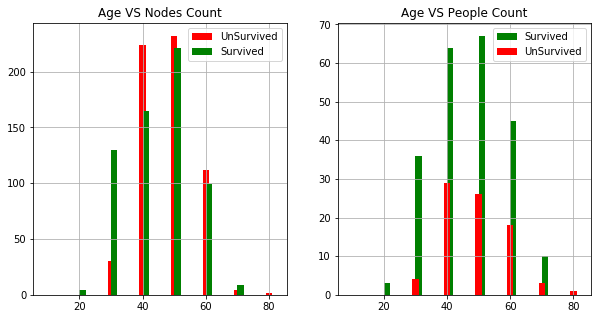

In [31]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(121)

plt.title('Age VS Nodes Count')
plt.bar(Survived_Unsurvived.Agegrp,Survived_Unsurvived['Unsurvived_Nodes'],color='r',label='UnSurvived',align='center',width=2)
plt.bar(Survived_Unsurvived.Agegrp,Survived_Unsurvived['Survived_Nodes'],color='g',label='Survived',align='edge',width=2)
plt.grid()
plt.legend()

plt.subplot(122)

plt.title('Age VS People Count')
plt.bar(Survived_Unsurvived.Agegrp ,Survived_Unsurvived['Survived_Count'],color='g',label='Survived',align='edge',width=2)
plt.bar(Survived_Unsurvived.Agegrp, Survived_Unsurvived['Unsurvived_Count'],color='r',label='UnSurvived',align='center',width=2)
plt.grid()
plt.legend()

# Observation:
    From the above two plots, we get insight that nodes might have influence in unsurvival rate.
    Less survival rate when: 
        Age is between 40-60
        

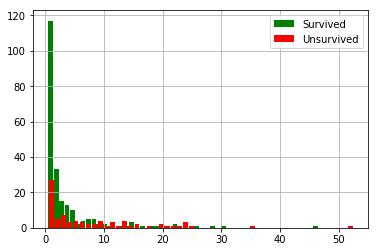

In [32]:
peaks,interval = np.histogram(df_survived.Nodes, bins=50)
plt.bar(interval[1:],peaks,color='g',label='Survived')
peaks,interval = np.histogram(df_unsurvived.Nodes, bins=50)
plt.bar(interval[1:],peaks,color='r',label='Unsurvived')
plt.legend()
plt.grid()

# Multivariate Analysis: 

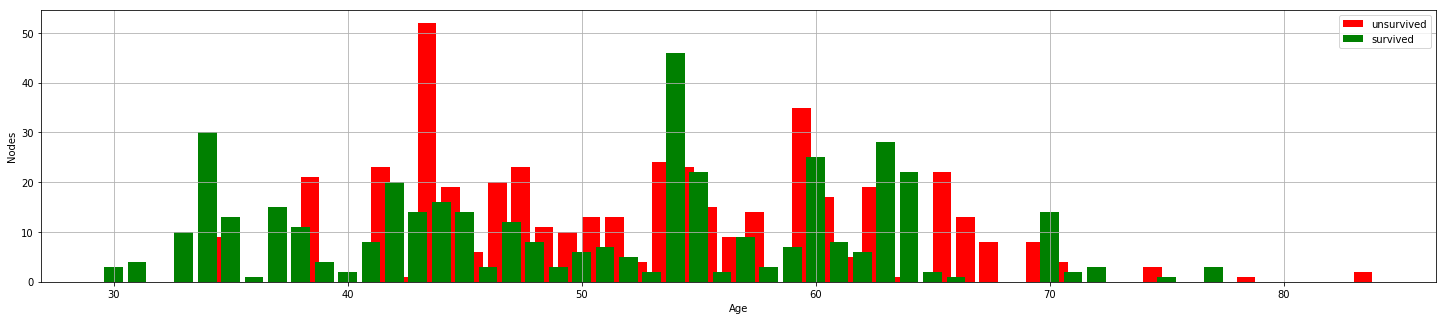

In [33]:
plt.figure(figsize=(25,5))
plt.bar(df_unsurvived.Age,df_unsurvived.Nodes,align='edge',label='unsurvived',color='r')
plt.bar(df_survived.Age,df_survived.Nodes,align='center',label='survived',color='g')
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.grid()
plt.legend()

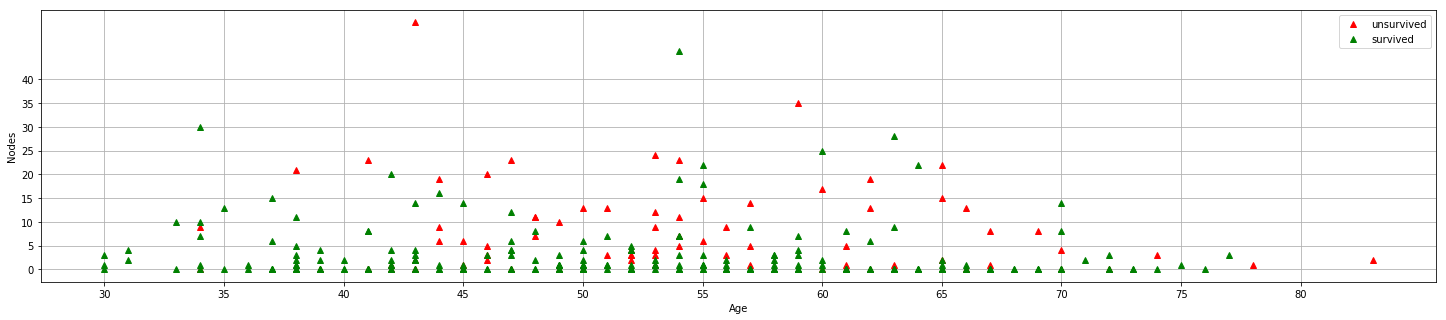

In [34]:
plt.figure(figsize=(25,5))
plt.plot(df_unsurvived.Age,df_unsurvived.Nodes,'r^',label='unsurvived')
plt.plot(df_survived.Age,df_survived.Nodes,'g^',label='survived')
plt.yticks([0,5,10,15,20,25,30,35,40])
plt.xticks([30,35,40,45,50,55,60,65,70,75,80])
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.grid()
plt.legend()

# Observation:
    large amount of unsurvived points can be found in middle and slightly upper region of the plot.
                

In [35]:
Cancer[(Cancer['Nodes']<3) & (Cancer['Age'].between(44,58))].count()

Age                 82
OperationYr         82
Nodes               82
Survival            82
Survived_Nodes      72
Unsurvived_Nodes    10
Survived_Count      72
Unsurvived_Count    10
dtype: int64

In [36]:
Cancer[(Cancer['Nodes']<3) & (Cancer['Survival'] == 2) & (Cancer['Age'].between(44,58))].count()

Age                 10
OperationYr         10
Nodes               10
Survival            10
Survived_Nodes       0
Unsurvived_Nodes    10
Survived_Count       0
Unsurvived_Count    10
dtype: int64

In [37]:
14/21

0.6666666666666666

# Observation:
    CASE 1:
        53% Chance of being unsurvived when:
            Age 45-70
            Nodes >=3
    CASE 2:
        61% chance of being unsurvived when:
            Age 44 - 58 
            Nodes >=6
    CASE 3:
        67% Chance of being unsurvived when:
            Age 44- 58 
            Nodes >=10     

# Model:
    We could create a model with the above insights:
        

In [38]:
def CancerModel(age,nodes):
    if nodes in range(0,3):
        print('Survival rate is high')
        
    elif nodes in range(3,6):              
        if age in range(45,71):
            print('Survival rate is 47%')
            
        else:
            print('Survival rate in unknown')
            
    elif nodes in range(6,9):              
            if age in range(44,59):
                print('Survival rate is 61%')
            
            else:
                print('Survival rate in unknown')
            
    elif nodes >=10:              
        if age in range(44,59):
            print('Survival rate is 67%')
            
        else:
            print('Survival rate in unknown')
            
    else:
        print('Input parameter doesnt come in range')
    



In [39]:
CancerModel(100,60)

Survival rate in unknown


In [40]:
CancerModel(55,21)

Survival rate is 67%


In [41]:
CancerModel(62,40)

Survival rate in unknown


In [42]:
CancerModel(100,0)

Survival rate is high


In [43]:
CancerModel(22,11)

Survival rate in unknown


In [45]:
CancerModel(50,12)

Survival rate is 67%
